In [14]:
import pandas as pd
import json
import requests
from pprint import pprint
import re

In [15]:
url = "https://public.opendatasoft.com/api/records/1.0/search/?dataset=global-shark-attack&q=&rows=1000&facet=date&facet=type&facet=country&facet=area&facet=activity&facet=sex&facet=age&facet=fatal_y_n&facet=time&facet=species"

response = requests.get(url)    # Will get a HTTP Status code (response object)

response_json = response.json()

In [16]:
# Just want to pull records 
records = response_json['records']

# Look at first record
pprint(len(records))

1000


In [17]:
# Need to make a list of the field dictionaries
records_fields = [x["fields"] for x in records]

# Check list to make sure correct info was collected
records_fields[0:1]

[{'activity': 'Surfing',
  'location': 'Jupiter Island, Martin County',
  'sex': 'M',
  'year': '2023',
  'injury': 'Injury to lower leg',
  'case_number': '2023.02.19.a',
  'time': '17h30',
  'name': 'Bert Krebs',
  'investigator_or_source': 'CBS, 2/22/2023',
  'age': '60',
  'date': '2023-02-19',
  'type': 'Unprovoked',
  'area': 'Florida',
  'country': 'USA',
  'fatal_y_n': 'N'}]

In [18]:
# Make a dataframe
df = pd.DataFrame(records_fields)
df.head(5)

,activity,location,sex,year,injury,case_number,time,name,investigator_or_source,age,...,area,country,fatal_y_n,href_formula,original_order,case_number1,species,href,pdf,case_number0
0,Surfing,"Jupiter Island, Martin County",M,2023,Injury to lower leg,2023.02.19.a,17h30,Bert Krebs,"CBS, 2/22/2023",60,...,Florida,USA,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Spearfishing,Ura Estate,M,2023,Questionable,2023.02.19,07h20,Samuela Kiniboi,"Fiji Sun, 2/25/2023",41,...,Taveuni Island,FIJI,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Floating in inflatable pool ring,"Beds, Wylie Bay, Esperance",F,2022,Torso bitten,2022.02.10.R,11h15,Jacquelin Morle,"K. McMurray, TrackingSharks.com",20.0,...,Western Australia,AUSTRALIA,N,http://sharkattackfile.net/spreadsheets/pdf_di...,6734,2022.02.05,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.02.05-Morle.pdf,2022.02.05
3,NaN,Karratha,M,2021,Laceration to foot,2021.04.24.a,15h40,male,"K. McMurray, TrackingSharks.com",NaN,...,Western Australia,AUSTRALIA,N,http://sharkattackfile.net/spreadsheets/pdf_di...,6649,2021.04.19,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.04.19-Karratha.pdf,2021.04.19
4,Surfing,Cacimba do Padre Beach,M,2021,Puncture wounds to right hand,2021.01.22,NaN,Sergo Noronha,"K. McMurray, TrackingSharks.com",52.0,...,Pernambuco,BRAZIL,N,http://sharkattackfile.net/spreadsheets/pdf_di...,6624,2021.01.13.b,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.01.13.b-Noronha.pdf,2021.01.13.b


In [19]:
# Make a cut pd with the fields: ["activity", "location", "sex", "year", "injury", "case_number", "time", "age", "type", "area", "country", "fatal_y_n", "species"]
df_cut = df.loc[:, ["activity", "location", "sex", "year", "injury", "case_number", "time", "age", "type", "area", "country", "fatal_y_n", "species"]]
df_cut.head(5)

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
0,Surfing,"Jupiter Island, Martin County",M,2023,Injury to lower leg,2023.02.19.a,17h30,60,Unprovoked,Florida,USA,N,NaN
1,Spearfishing,Ura Estate,M,2023,Questionable,2023.02.19,07h20,41,Questionable,Taveuni Island,FIJI,N,NaN
2,Floating in inflatable pool ring,"Beds, Wylie Bay, Esperance",F,2022,Torso bitten,2022.02.10.R,11h15,20.0,Unprovoked,Western Australia,AUSTRALIA,N,White shark
3,NaN,Karratha,M,2021,Laceration to foot,2021.04.24.a,15h40,NaN,Unprovoked,Western Australia,AUSTRALIA,N,NaN
4,Surfing,Cacimba do Padre Beach,M,2021,Puncture wounds to right hand,2021.01.22,NaN,52.0,Unprovoked,Pernambuco,BRAZIL,N,NaN


# Pie Chart looking at shark attacks by sex

<AxesSubplot:title={'center':"Sex of 'Victims'"}>

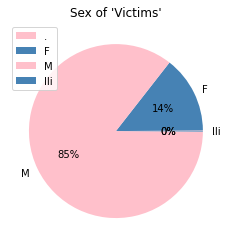

In [20]:
df_sex = df_cut.groupby(["sex"])["sex"].count()
colors = ["pink", "steelblue"]
df_sex.plot(kind="pie", ylabel="", autopct='%1.0f%%', colors=colors, legend=True, title = "Sex of 'Victims'")



# Clean up Species 

In [21]:
# Replace na's with 'unknown'
df_cut["species"].fillna("unknown", inplace=True)
df_cut

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
0,Surfing,"Jupiter Island, Martin County",M,2023,Injury to lower leg,2023.02.19.a,17h30,60,Unprovoked,Florida,USA,N,unknown
1,Spearfishing,Ura Estate,M,2023,Questionable,2023.02.19,07h20,41,Questionable,Taveuni Island,FIJI,N,unknown
2,Floating in inflatable pool ring,"Beds, Wylie Bay, Esperance",F,2022,Torso bitten,2022.02.10.R,11h15,20.0,Unprovoked,Western Australia,AUSTRALIA,N,White shark
3,NaN,Karratha,M,2021,Laceration to foot,2021.04.24.a,15h40,NaN,Unprovoked,Western Australia,AUSTRALIA,N,unknown
4,Surfing,Cacimba do Padre Beach,M,2021,Puncture wounds to right hand,2021.01.22,NaN,52.0,Unprovoked,Pernambuco,BRAZIL,N,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Swimming,"Second Beach, Port St. Johns",M,2012,FATAL,2012.01.18.b,15h40,25,Unprovoked,Eastern Cape Province,SOUTH AFRICA,Y,Thought to involve a bull shark
996,Surfing,"Teahupoo, Tahiti",M,2011,"No injury, board bitten",2011.08.17.b.,15h30,32,Unprovoked,Society Islands,FRENCH POLYNESIA,N,Grey reef shark
997,Playing in the surf,"North Topsail Beach, Onslow County",F,2011,Ankle bitten,2011.06.29,Afternoon,10,Unprovoked,North Carolina,USA,N,"Bull shark, 6'"
998,Wading,"New Smyrna Beach, Volusia County",M,2011,Puncture wound to calf,2011.06.06.R,12h00,19,Unprovoked,Florida,USA,N,3' to 4' shark


In [22]:
# Examine all the possible species
df_cut["species"].unique()

array(['unknown', 'White shark', 'Bull shark pup', 'Cookiecutter shark',
       'Spinner shark', "Tiger shark, 10' to 12'", "Nurse shark, 5'",
       'Nurse shark', 'Spinner shark, 4 to 5 feet', "Nurse shark, 2'",
       'Wobbegong shark', "Bull shark, 8'", 'Lemon shark, 3.5 m',
       '2 m shark', '1m shark', "4' to 6' shark", 'Galapagos shark',
       'Wobbegong, 2m', "4' shark", "Tiger shark, 8'",
       "Porbeagle shark, 7'", 'No shark involvement', '18 to 24 shark',
       "5' shark", 'Shark involvement not confirmed', "6' to 8' shark",
       'Shark involvement prior to death not confirmed', '80 kg shark',
       'Lemon shark', "Tiger shark, 12'", 'Questionable Incident',
       '1.5 m shark', 'White shark, 3m',
       "0.9 m to 1.2 m [3' to 4'] white shark",
       "Tiger shark, 2.4 m to 3 m [8' to 10']",
       "White shark, 4.5 m [14'9]", 'Invalid',
       'Thought to involve a Zambesi shark', "Mako shark, 2 m [6.75']",
       "3' to 4' shark", 'Grey reef shark, 1.5 m',
      

In [23]:
# Clean up data by finding key words and replacing the species information 
# For example, any species that has bull in it will just be replaced with "bull shark"
# any species that has "Great" and "white" will be replaced with "Great white"
# Any species with "Tiger" will be replaced with "Tiger"
# Hammerhead, Mako, Spinner, Nurse, Cookiecutter, Blacktip, Raggedtooth, Zambesi, Grey reef shark, dogfish, wobbegong
# If "or" than species will be replaced with "unknown"
#  

In [26]:
# Function to search for great white buzz words and replace them with "great white" also included C. obscurus (dusky)
def whiteshark(species):
    p = '[Ww]hite'
    if re.search('[Ww]hitetip', species):   # Need to watch out for whitetip species (not great whites)
        return "whitetip"
    elif re.search(p, species):     # great white sharks are just called "white sharks" in much of the world
        return "great white"
    elif re.search('C. obscurus', species):     # Replace species name with common name: dusky
        return 'dusky'
    #elif re.search('?', species) or re.search('\sor\s', species):   # If there is a question mark or an "or" than replace with "unknown"
        #return 'unknown'
    return species  # else just return the species listed for further inspection later


In [27]:
df_cut["species"] = df_cut["species"].apply(whiteshark)
df_cut

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
0,Surfing,"Jupiter Island, Martin County",M,2023,Injury to lower leg,2023.02.19.a,17h30,60,Unprovoked,Florida,USA,N,unknown
1,Spearfishing,Ura Estate,M,2023,Questionable,2023.02.19,07h20,41,Questionable,Taveuni Island,FIJI,N,unknown
2,Floating in inflatable pool ring,"Beds, Wylie Bay, Esperance",F,2022,Torso bitten,2022.02.10.R,11h15,20.0,Unprovoked,Western Australia,AUSTRALIA,N,great white
3,NaN,Karratha,M,2021,Laceration to foot,2021.04.24.a,15h40,NaN,Unprovoked,Western Australia,AUSTRALIA,N,unknown
4,Surfing,Cacimba do Padre Beach,M,2021,Puncture wounds to right hand,2021.01.22,NaN,52.0,Unprovoked,Pernambuco,BRAZIL,N,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Swimming,"Second Beach, Port St. Johns",M,2012,FATAL,2012.01.18.b,15h40,25,Unprovoked,Eastern Cape Province,SOUTH AFRICA,Y,Thought to involve a bull shark
996,Surfing,"Teahupoo, Tahiti",M,2011,"No injury, board bitten",2011.08.17.b.,15h30,32,Unprovoked,Society Islands,FRENCH POLYNESIA,N,Grey reef shark
997,Playing in the surf,"North Topsail Beach, Onslow County",F,2011,Ankle bitten,2011.06.29,Afternoon,10,Unprovoked,North Carolina,USA,N,"Bull shark, 6'"
998,Wading,"New Smyrna Beach, Volusia County",M,2011,Puncture wound to calf,2011.06.06.R,12h00,19,Unprovoked,Florida,USA,N,3' to 4' shark


In [28]:
# The sharks list was created by combing through the species.unique() 
sharks = ['hammerhead', 'mako' 'spinner', 'nurse', 'cookiecutter', 'blacktip', 'raggedtooth', 'zambesi', 'reef', 'dogfish', 'wobbegong', "tiger", "bull", "bronze whaler", "sand", "lemon", "blue", "Port Jackson", "thresher", "shovelnose", "porbeagle", "dusky", "banjo", "silvertip"]

# Function created to check if a species is from the approved list; if it is not, then it is replaced with 'unknown'
def clean_shark_species(species):
    for p in sharks:
        if re.search(p, species) or re.search(p.capitalize(), species):
            return p.lower()
    return "unknown"

In [29]:
# Apply filtering function to the species column 
df_cut["species"] = df_cut["species"].apply(clean_shark_species)
df_cut

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
0,Surfing,"Jupiter Island, Martin County",M,2023,Injury to lower leg,2023.02.19.a,17h30,60,Unprovoked,Florida,USA,N,unknown
1,Spearfishing,Ura Estate,M,2023,Questionable,2023.02.19,07h20,41,Questionable,Taveuni Island,FIJI,N,unknown
2,Floating in inflatable pool ring,"Beds, Wylie Bay, Esperance",F,2022,Torso bitten,2022.02.10.R,11h15,20.0,Unprovoked,Western Australia,AUSTRALIA,N,unknown
3,NaN,Karratha,M,2021,Laceration to foot,2021.04.24.a,15h40,NaN,Unprovoked,Western Australia,AUSTRALIA,N,unknown
4,Surfing,Cacimba do Padre Beach,M,2021,Puncture wounds to right hand,2021.01.22,NaN,52.0,Unprovoked,Pernambuco,BRAZIL,N,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Swimming,"Second Beach, Port St. Johns",M,2012,FATAL,2012.01.18.b,15h40,25,Unprovoked,Eastern Cape Province,SOUTH AFRICA,Y,bull
996,Surfing,"Teahupoo, Tahiti",M,2011,"No injury, board bitten",2011.08.17.b.,15h30,32,Unprovoked,Society Islands,FRENCH POLYNESIA,N,reef
997,Playing in the surf,"North Topsail Beach, Onslow County",F,2011,Ankle bitten,2011.06.29,Afternoon,10,Unprovoked,North Carolina,USA,N,bull
998,Wading,"New Smyrna Beach, Volusia County",M,2011,Puncture wound to calf,2011.06.06.R,12h00,19,Unprovoked,Florida,USA,N,unknown


In [30]:
# Check what unique values are now present 
df_cut['species'].unique()

array(['unknown', 'bull', 'cookiecutter', 'tiger', 'nurse', 'wobbegong',
       'lemon', 'porbeagle', 'zambesi', 'reef', 'blue', 'blacktip',
       'hammerhead', 'sand', 'bronze whaler', 'raggedtooth', 'dogfish',
       'silvertip', 'dusky', 'shovelnose'], dtype=object)

# Clean up Countries

In [36]:
# Capitalize all countries so theyre the same 
df_cut["country"].str.upper()

0                   USA
1                  FIJI
2             AUSTRALIA
3             AUSTRALIA
4                BRAZIL
             ...       
995        SOUTH AFRICA
996    FRENCH POLYNESIA
997                 USA
998                 USA
999        SOUTH AFRICA
Name: country, Length: 1000, dtype: object

# Clean up activities

In [38]:
df_cut["type"].unique()

array(['Unprovoked', 'Questionable', 'Watercraft', 'Provoked', 'Invalid',
       'Sea Disaster', 'Boat', nan], dtype=object)

### Identify invalid interactions (shark involvement unlikely)

In [39]:
# df_cut[df_cut["type"]=="Watercraft"]
# Watercraft interactions are when people are in boats and interact with sharks
# Eliminating if injury is unrelated to shark damaging someone or a boat
# 15, 28, 79, 123, 158, 644, 645, 674, 676, 679, 872, 902, 960

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
15,Paddling,"Oceanside, San Diego County",F,2018,"No injury to occupant, outrigger canoe and pad...",2018.07.07,18h00,57.0,Watercraft,California,USA,N,unknown
26,Fishing,"Julian Rocks, Byron Bay",M,2015,Bruised in falling overboard as shark bumped boat,2015.03.18,Morning,NaN,Watercraft,New South Wales,AUSTRALIA,N,unknown
79,Fishing for whiting,"3 km off Port Victoria, Yorke Peninsula",NaN,2000,No injury to occupants,2000.12.24,NaN,NaN,Watercraft,South Australia,AUSTRALIA,N,unknown
83,Fishing,"Papamoa Beach, Bay of Plenty",M,2000,"No injury, shark bit the dinghy",2000.07.00,NaN,NaN,Watercraft,North Island,NEW ZEALAND,N,unknown
115,Rowing,Swartkops River mouth,M,1984,"No injury to occupant, shark seized oar and di...",1984.03.17,NaN,NaN,Watercraft,Eastern Cape Province,SOUTH AFRICA,N,unknown
123,NaN,Seal Island,NaN,1979,No Injury,1979.03.24,NaN,NaN,Watercraft,Western Cape Province,SOUTH AFRICA,N,unknown
126,Boat,Gordon’s Bay,NaN,1976,"No injury to occupants, shark leapt on bow of ...",1976.11.23,NaN,NaN,Watercraft,Western Cape Province,SOUTH AFRICA,N,unknown
158,Fishing,False Bay,NaN,1963,"No injury to occupant, shark leapt inside boat",1963.01.28,NaN,NaN,Watercraft,Western Cape Province,SOUTH AFRICA,N,unknown
164,Fishing,"Off La Jolla Cove, San Diego County",NaN,1959,"No injury to occupant, shark rammed boat",1959.07.25.b,NaN,NaN,Watercraft,California,USA,N,hammerhead
166,"On boat, preparing to dive",Miami,M,1959,Boat followed shark; shark holed boat,1959.03.29,NaN,NaN,Watercraft,Florida,USA,N,tiger


In [40]:
df_cut[df_cut["type"]=="Questionable"]
# Remove interactions with too little information
# 1

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
1,Spearfishing,Ura Estate,M,2023,Questionable,2023.02.19,07h20,41,Questionable,Taveuni Island,FIJI,N,unknown
246,Kayaking,NaN,M,2019,Partial remains recovered 12/26/2019 from shark,2019.12.21,NaN,70.0,Questionable,NaN,REUNION ISLAND,F,tiger


In [41]:
df_cut[df_cut["type"]=="Invalid"]
# 42, 45, 50, 54, 

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
42,Dragging stranded shark into deeper water,Bullcock Beach,M,2013,"No injury, a 3 m blue shark merely snapped at ...",2013.01.26,NaN,62,Invalid,Queensland,AUSTRALIA,UNKNOWN,unknown
45,Swimming,Buccari Bay,NaN,2012,Leg struck. Initally reported as a shark attac...,2012.07.07.a,NaN,60,Invalid,NaN,CROATIA,UNKNOWN,unknown
50,Swimming,Native Dog Beach,M,2010,Death may have been due to drowning,2010.11.30.a,NaN,NaN,Invalid,Western Australia,AUSTRALIA,UNKNOWN,unknown
54,Surfing,"Huntington Beach, Orange County",M,2009,Puncture wounds to right foot,2009.12.12,15h30,49,Invalid,California,USA,UNKNOWN,unknown
56,Swimming,"Corolla, Currituck County",M,2009,FATAL,2009.09.15,21h00,60,Invalid,North Carolina,USA,Y,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,NaN,Tarrafal,F,1929,Body of woman recovered from 15' shark,1929.08.05,NaN,NaN,Invalid,Santiago Island,CAPE VERDE,UNKNOWN,unknown
924,Jumped overboard,Near the equator,M,1909,FATAL,1909.04.09.R,NaN,36,Invalid,NaN,NaN,UNKNOWN,unknown
926,NaN,"Marathon, Monroe County",M,1908,"FATAL, but shark involvement prior to death wa...",1908.06.02.R,NaN,NaN,Invalid,Florida,USA,UNKNOWN,unknown
938,Bathing,"Pensacola Bay, Escambia County",M,1881,FATAL,1882.00.00.a,NaN,18,Invalid,Florida,USA,UNKNOWN,unknown


In [42]:
# Checked injury to identify legitimate
#df_cut[df_cut["type"]=="Sea Disaster"]

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
122,Floating with life preserver after his boat fo...,10 miles off Cape Canaveral,M,1979,Lacerations to leg,1979.08.05,Morning,56,Sea Disaster,Florida,USA,N,unknown
145,The shrimper Loless Maurine capsized in heavy ...,Cabo Rojo,M,1967,FATAL,1967.03.09,14h00,NaN,Sea Disaster,Veracruz,MEXICO,Y,unknown
220,Fleet of canoes caught by a squall and charged...,Between Nanumea & Nanumaga Atolls,NaN,1874,"2 people out of +70 survived, one of whom was ...",1874.06.00,Night,NaN,Sea Disaster,NaN,TUVALU,Y,unknown
362,Swimming from the New Venture,"Off Lodestone Reef, Great Barrier Reef, north ...",F,1983,"FATAL, shark seized her by the chest and took ...",1983.08.13.a,04h00,21.0,Sea Disaster,Queensland,AUSTRALIA,Y,tiger
370,Shipwreck,Sarcelle,NaN,1976,It was believed that survivors were killed by ...,1976.10.18,NaN,NaN,Sea Disaster,NaN,NEW CALEDONIA,N,unknown
389,"Boat, with 42 passengers onboard, capsized in ...",100 miles southeast of Manila,NaN,1963,"Of the 42 people on board, 5 died of exposure,...",1963.06.01.a,NaN,NaN,Sea Disaster,Luzon Island,PHILIPPINES,Y,unknown
418,Flying Tiger transport plane went down with 5 ...,Between Wake & Johnston Islands,M,1955,FATAL,1955.11.00,NaN,NaN,Sea Disaster,1000 miles west of Hawaii,NORTH PACIFIC OCEAN,Y,unknown
420,"American freighter Mormackite, bound from Buen...",150 miles off Cape Henry,M,1954,Rescue aircraft saw bodies in the water being ...,1954.12.04,NaN,NaN,Sea Disaster,Virginia,USA,Y,unknown
435,B-24 aircraft crashed into the sea,NaN,M,1944,FATAL,1944.01.04,NaN,NaN,Sea Disaster,Adriatic Sea,ITALY,Y,unknown
436,The Cuban freighter Libertad was torpedoed and...,Off Charleston,M,1943,"Of the 18 crew who survived the sinking, 10 we...",1944.00.00.a,NaN,NaN,Sea Disaster,South Carolina,USA,Y,unknown
